In [ ]:
%pip install pymc3

In [ ]:
%pip install pandas==1.5.2

## Libraries:

In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import arviz as az
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import halfnorm
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme()
az.style.use('arviz-darkgrid')
np.random.seed(44)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Preprocessing
For the unpooled and hierarchical models

In [5]:
# Data
training = pd.read_pickle("train.pkl")
testing = pd.read_pickle("test.pkl")

# Save the player for novel predictions
novel_player_features = training.tail(1).x_train_1.values[0]
novel_player_features = training.tail(1).x_train_1.values[0]

# remove the last row with the problematic player
training = training.drop(training.index[[-1]])
testing = testing.drop(testing.index[[-1]])

# Features and labels:
x_train = [np.concatenate(training.iloc[i, 2:42].values).reshape(40, 40) for i in range(5)]
y_train = [training.iloc[i, 42:82].values.astype(np.float64) for i in range(5)]
x_test = [testing.iloc[i, 1].reshape(40, 1) for i in range(5)]
y_test = [testing.iloc[i, 2].astype(np.float64) for i in range(5)]

## Unpooled model

In [54]:
unpooled_models = []
unpooled_traces = []
for i in range(5):
    # sampling variables
    mu_y = y_train[i].mean()
    s_y = y_train[i].std()
    s_x = np.mean(np.std(x_train[i]))

    # model
    with pm.Model() as unpooled_model:
        # priors:
        alpha = pm.Normal('alpha', mu=mu_y, sigma=s_y)
        beta = pm.Normal('beta', mu=0, sigma=s_x, shape=40)
        sigma = pm.HalfNormal('sigma', sigma=s_y)

        # likelihood:
        mu = alpha + pm.math.dot(x_train[i], beta)

        # observed data:
        y_pred = pm.StudentT ('y_pred', nu=4, mu=mu, sd=sigma, 
                              observed= y_train[i])
        trace = pm.sample(1000, tune=1000, chains=2, return_inferencedata=True)

    unpooled_models.append(unpooled_model)
    unpooled_traces.append(trace)

ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


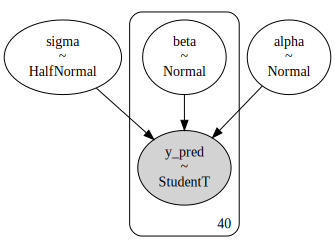

In [114]:
pm.model_to_graphviz(unpooled_models[0])

### Convergence check

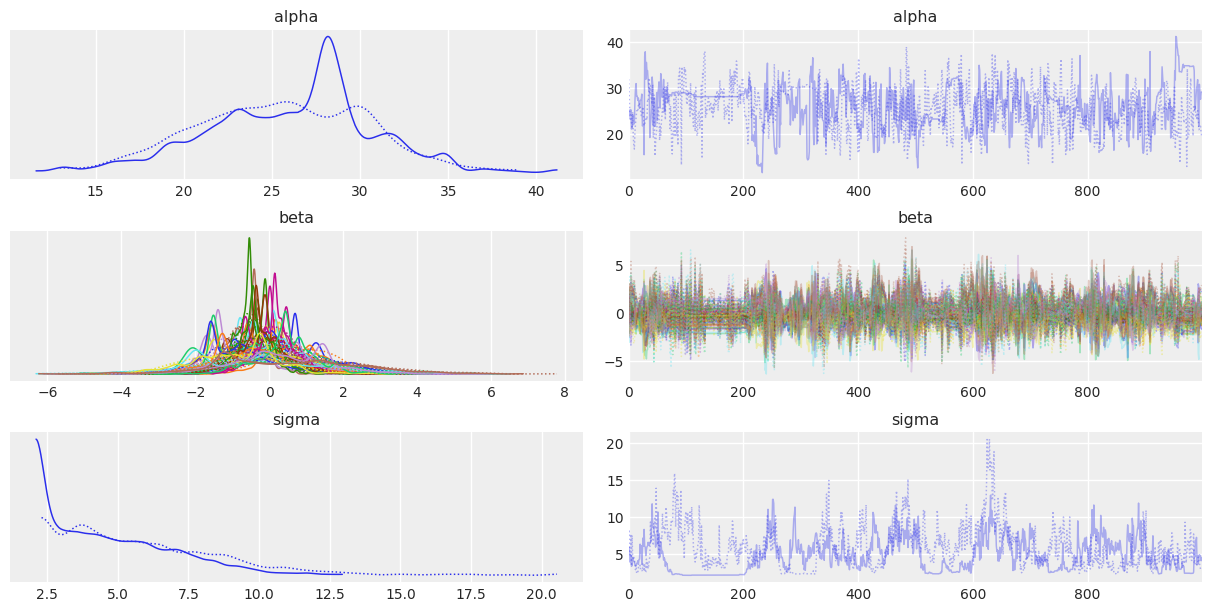

In [55]:
with unpooled_models[0]:
    az.plot_trace(unpooled_traces[0])

In [56]:
with unpooled_models[0]:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,16.281,7.810,1.742,30.446,0.337,0.238,538.0,1198.0,1.01
beta[0],-0.634,1.284,-2.876,1.874,0.126,0.089,101.0,234.0,1.01
beta[1],0.126,0.842,-1.342,1.781,0.053,0.037,257.0,458.0,1.01
beta[2],2.087,2.823,-3.689,6.864,0.282,0.200,99.0,256.0,1.01
beta[3],1.012,1.220,-1.087,3.317,0.101,0.072,139.0,343.0,1.01
beta[4],-0.461,1.172,-2.662,1.756,0.108,0.076,115.0,285.0,1.01
beta[5],-0.848,0.949,-2.431,1.051,0.082,0.058,136.0,321.0,1.01
beta[6],0.294,0.958,-1.421,2.275,0.050,0.035,355.0,669.0,1.02
beta[7],-0.847,0.992,-2.816,0.994,0.050,0.035,365.0,899.0,1.01
beta[8],0.815,1.464,-1.823,3.703,0.092,0.065,248.0,393.0,1.02


## Posterior prediction of the mean for LeBron James with the unpooled model

In [13]:
x_lebron = np.array(x_train)[0, :, :]
x_lebron.shape

(40, 40)

In [40]:
trace_lb = unpooled_traces[0]
model_lb = unpooled_models[0]

In [41]:
alpha_samples = trace_lb['alpha'][0]
beta_samples = trace_lb['beta'][0]
mu_player = alpha_samples + np.dot(x_lebron, beta_samples.T)

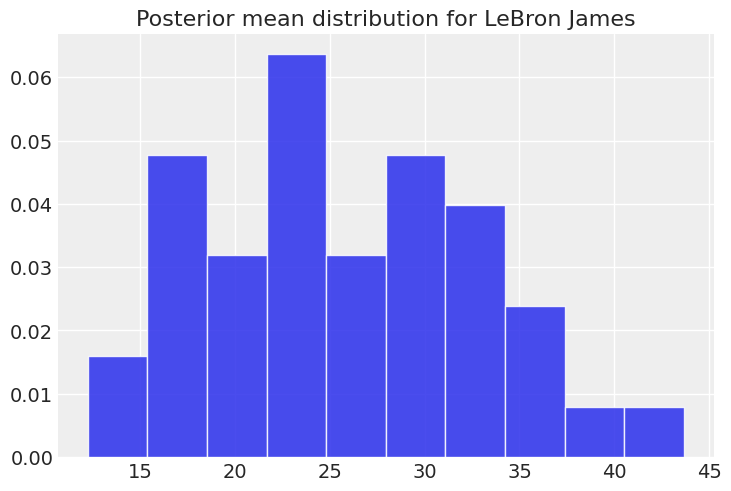

LeBron James predicted mean: 25.612
LeBron James predicted mean standard deviation: 7.170


In [42]:
# plot the posterior mean distribution
plt.hist(mu_player, bins=10, density=True, alpha=0.85)
plt.title('Posterior mean distribution for LeBron James')
plt.show()

# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted mean: {mu_player.mean():.3f}')
print(f'LeBron James predicted mean standard deviation: {mu_player.std():.3f}')

### Posterior prediction of LeBron's points with the unpooled model

In [43]:
post_up = az.convert_to_dataset(trace_lb)
mu_lb_up = post_up.alpha[0]
sigma_up = post_up.sigma.values[0]

y_lb_unpooled = np.zeros(len(mu_lb_up))

for i, current_mu in enumerate(mu_lb_up):
    y_lb_unpooled[i] = np.random.normal(loc = mu_lb_up[i], scale = sigma_up[i])

df = pd.DataFrame(y_lb_unpooled)
df.describe(percentiles=[0.025, 0.975])

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,0
count,1000.000000
mean,25.655802
std,4.169722
min,8.638831
2.5%,17.076664
50%,25.758453
97.5%,33.723508
max,43.044217


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


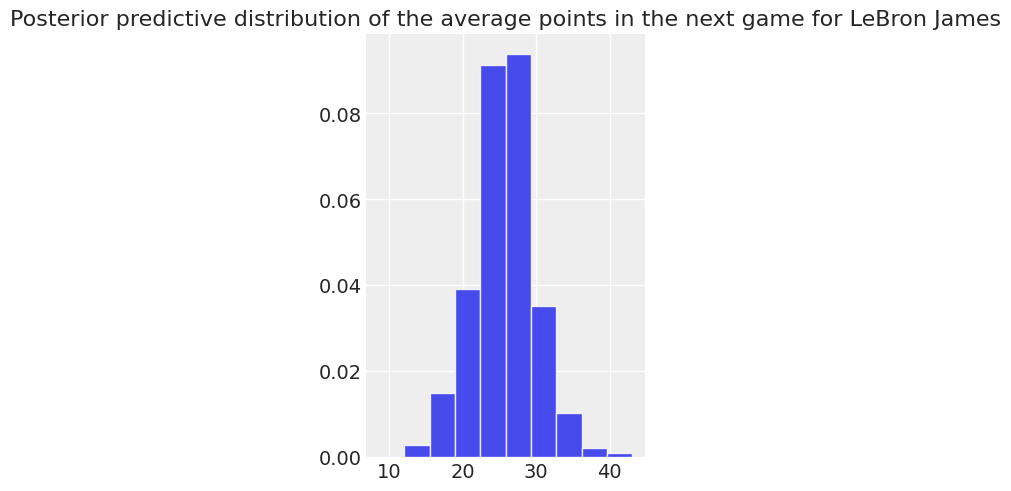

LeBron James predicted points: 25.656
LeBron James predicted points standard deviation: 4.168


In [44]:
# plot the posterior predictive distribution
plt.hist(y_lb_unpooled, bins=10, density=True, alpha=0.85)
plt.title('Posterior predictive distribution of the average points in the next game for LeBron James')
plt.show()

# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted points: {y_lb_unpooled.mean():.3f}')
print(f'LeBron James predicted points standard deviation: {y_lb_unpooled.std():.3f}')

## Hierarchical model

Hierarchical Linear Regression

In this model, we assume that all players share a common underlying distribution for their coefficients, but allow for some variation among players. The model is defined as:

​ 

where:

$y_{i,j}$: the player j's observed score for game i.

$\alpha_j$ : the intercept for player j.

$x_i$: the standardized points scored for game i.

$\beta_j$ : the regression coefficients for the j-th feature of the model for player j.

$\epsilon_i$ random variation of the measures.

In this model, we sample $\alpha_j$ and $\beta_j$ values for each player j from a common distribution, with hyper-priors:

$\mu_{\alpha} \sim Normal(\mu_{y}, \sigma_{y})$

$\sigma_{\alpha} \sim HalfNormal(6.8)$

$\mu_{\beta} \sim Normal(0,10)$

$\sigma_{\beta} \sim HalfNormal(10)$

$\sigma \sim HalfNormal(\sigma_{y})$

with 5 players.

In [8]:
hier_models = []
hier_traces = []
for i in range(5):

    # sampling variables
    mu_y = y_train[i].mean()
    s_y = y_train[i].std()
    s_x = np.mean(np.std(x_train[i]))

    with pm.Model() as hierarchical_model_mlr:
        # hyper-priors
        mu_alpha = pm.Normal('mu_alpha', mu=mu_y, sigma=s_y)
        sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=10)
        mu_beta = pm.Normal('mu_beta', mu=0, sigma=10, shape=40)
        sigma_beta = pm.HalfNormal('sigma_beta', sigma=10)
        sigma = pm.HalfNormal('sigma', sigma=s_y)

        # priors
        alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha)
        beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=40)

        # likelihood
        mu = alpha + pm.math.dot(x_train[i], beta)
        y_pred = pm.StudentT('y_pred', nu=4, mu=mu, sd=sigma, observed=y_train[i])

        trace = pm.sample(1000, tune=1000, cores=2, chains=2, return_inferencedata=True)
        hier_models.append(hierarchical_model_mlr)
        hier_traces.append(trace)


ERROR:pymc3:There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 275 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


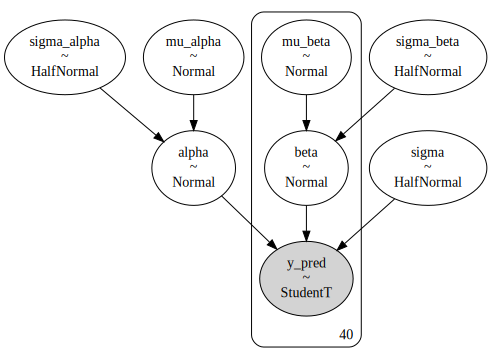

In [39]:
pm.model_to_graphviz(hier_models[0])

## Convergence

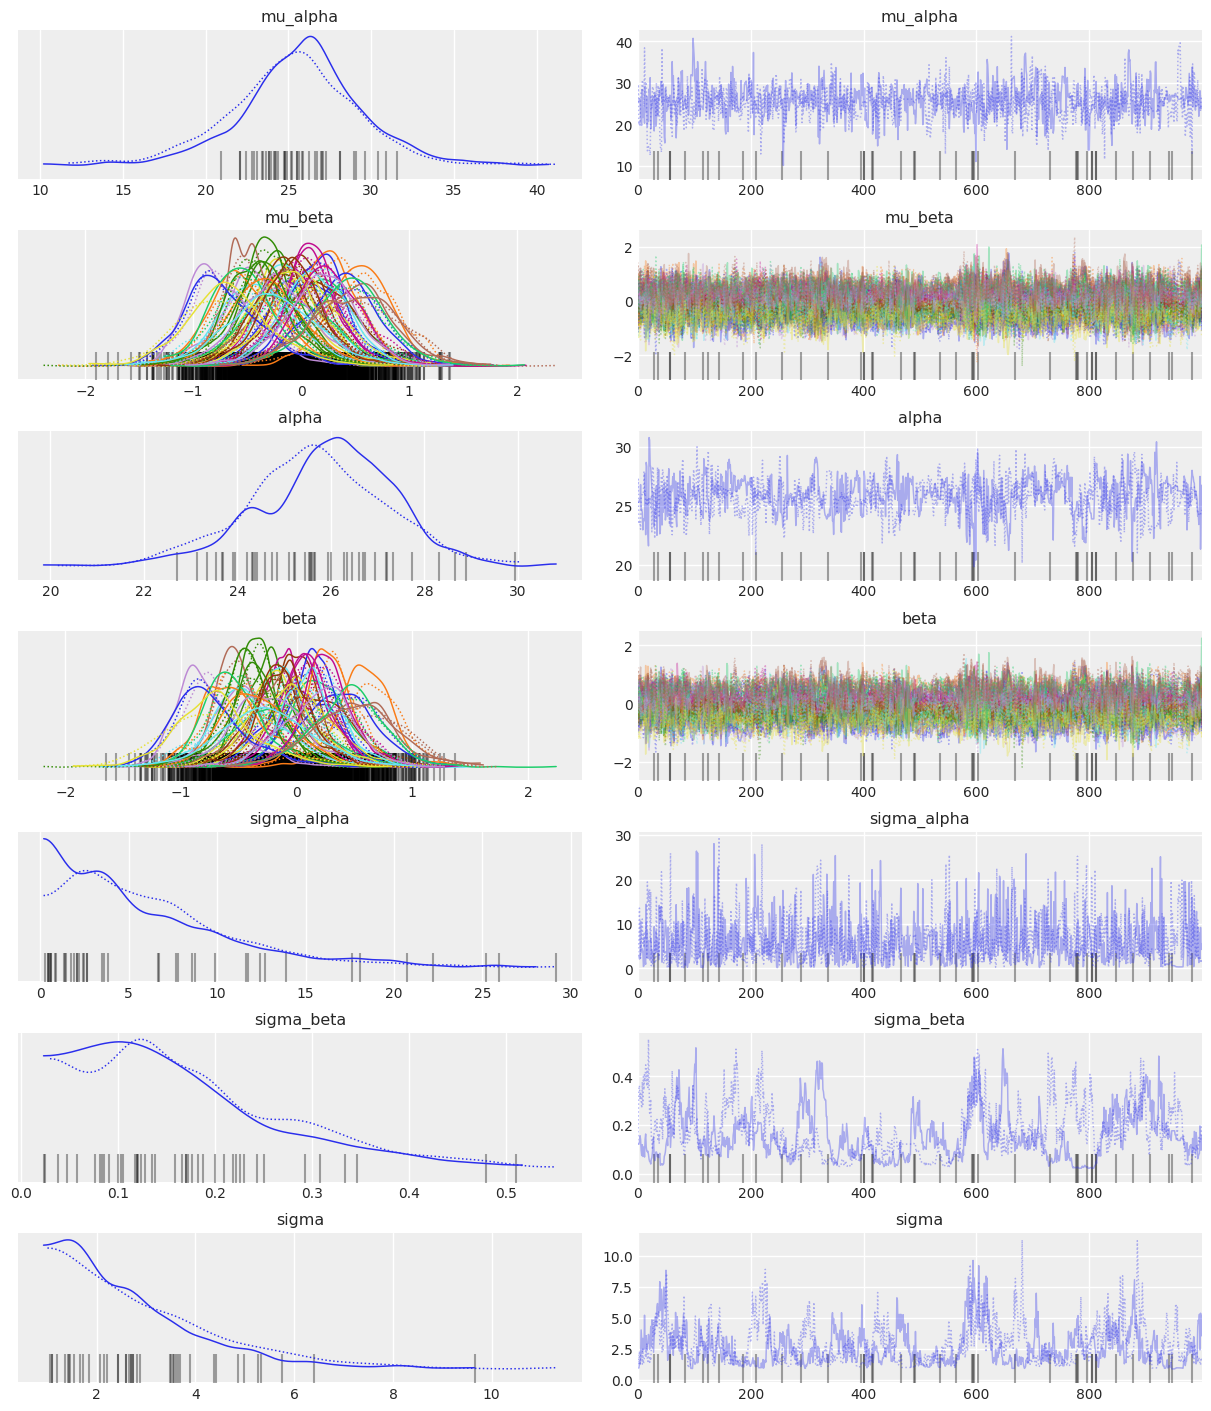

In [40]:
az.plot_trace(hier_traces[0]);

In [41]:
with unpooled_models[0]:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,14.385,31.880,-38.433,75.271,4.774,3.398,35.0,126.0,1.07
beta[0],-1.241,6.623,-8.342,15.375,1.738,2.392,19.0,12.0,1.24
beta[1],1.550,2.642,-1.526,6.777,1.198,0.904,6.0,41.0,1.24
beta[2],6.677,7.631,-4.954,17.614,1.555,1.113,22.0,33.0,1.13
beta[3],0.126,8.600,-23.705,7.218,2.768,3.095,24.0,15.0,1.23
...,...,...,...,...,...,...,...,...,...
sigma_beta[36],17.109,22.518,0.229,40.710,2.029,1.438,41.0,81.0,1.05
sigma_beta[37],18.880,45.085,0.206,52.619,2.920,2.067,13.0,24.0,1.13
sigma_beta[38],24.096,32.976,0.136,84.413,4.123,2.929,60.0,48.0,1.04
sigma_beta[39],25.742,58.494,0.368,76.060,4.098,2.902,153.0,204.0,1.04


## Posterior mean for LeBron James with the hierarchical model

In [9]:
trace_lb_hier = hier_traces[0]
model_lb_hier = hier_models[0]

In [42]:
alpha_samples = trace_lb_hier.posterior.alpha.values.reshape(2000)
beta_samples = trace_lb_hier.posterior.beta.values.reshape(2000, 40)
mu_player_hier = alpha_samples + np.dot(x_lebron, beta_samples.T)

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


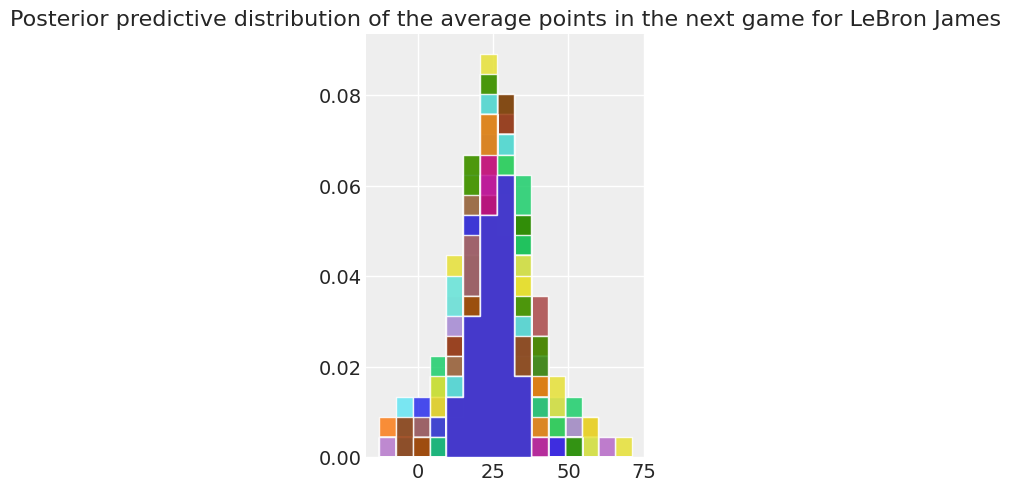

LeBron James predicted mean: 25.037
LeBron James predicted mean standard deviation: 6.875


In [43]:
# plot the posterior mean distribution
plt.hist(mu_player_hier, bins=15, density=True,histtype='stepfilled',  alpha=0.85)
plt.title('Posterior predictive distribution of the average points in the next game for LeBron James')
plt.show()

# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted mean: {mu_player_hier.mean():.3f}')
print(f'LeBron James predicted mean standard deviation: {mu_player_hier.std():.3f}')

## Posterior prediction for LeBron James with the hierarchical model

In [44]:
post_hier = az.convert_to_dataset(trace_lb_hier)
mu_lb_hier = post_hier.alpha[0]
sigma_hier = post_hier.sigma.values[0]

y_lb_hier = np.zeros(len(mu_lb_hier))

for i, current_mu in enumerate(mu_lb_hier):
    y_lb_hier[i] = np.random.normal(loc = mu_lb_hier[i], scale = sigma_hier[i])

#the predictions of the hierarchical model are slightly lower and pulled towards the mean of the pooled model.
#yet the difference is small since there are many songs from Beyonce. 
df = pd.DataFrame(y_lb_hier)
df.describe(percentiles=[0.025, 0.975])

,0
count,1000.000000
mean,25.945907
std,3.408728
min,11.776221
2.5%,18.215893
50%,26.063933
97.5%,32.318317
max,47.625560


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


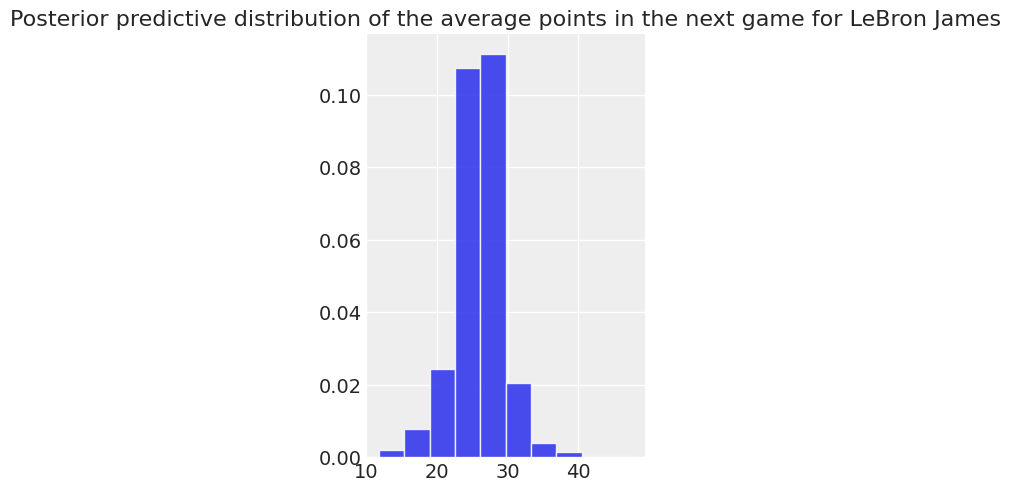

LeBron James predicted points: 25.946
LeBron James predicted points standard deviation: 3.407


In [45]:
# plot the posterior predictive distribution
plt.hist(y_lb_hier, bins=10, density=True, alpha=0.85)
plt.title('Posterior predictive distribution of the average points in the next game for LeBron James')
plt.show()

# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted points: {y_lb_hier.mean():.3f}')
print(f'LeBron James predicted points standard deviation: {y_lb_hier.std():.3f}')

### Novel prediction with the hierarchical model

In [46]:
# 
x_new = novel_player_features
x_new = np.array(x_new, dtype=float)

In [58]:
with pm.Model() as h_w_pred:
    # hyper-priors

    mu_alpha = pm.Normal('mu_alpha', mu=9, sigma=4)
    sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=10)
    mu_beta = pm.Normal('mu_beta', mu=0, sigma=10, shape=40)
    sigma_beta = pm.HalfNormal('sigma_beta', sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=6.8)

    # priors
    alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha)
    beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=40)

    # likelihood
    mu = alpha + pm.math.dot(x_train, beta)
    y_pred = pm.StudentT('y_pred', nu=4, mu=mu, sd=sigma, observed=y_train)

    # Novel player
    x_novel = pm.Data("x_novel", x_new)
    mu_novel = alpha + pm.math.dot(x_novel, beta)
    y_novel = pm.Normal("y_novel", mu=mu_novel, sigma=sigma)

    trace_h_novel = pm.sample(1000, tune=1000, cores=2, chains=2, return_inferencedata=True)

ERROR:pymc3:There were 297 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


In [59]:
with h_w_pred:
    display(az.summary(trace_h, var_names=['y_novel']))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_novel,5.957,7.878,-8.602,20.101,0.178,0.152,1971.0,1417.0,1.0


## Convergence check

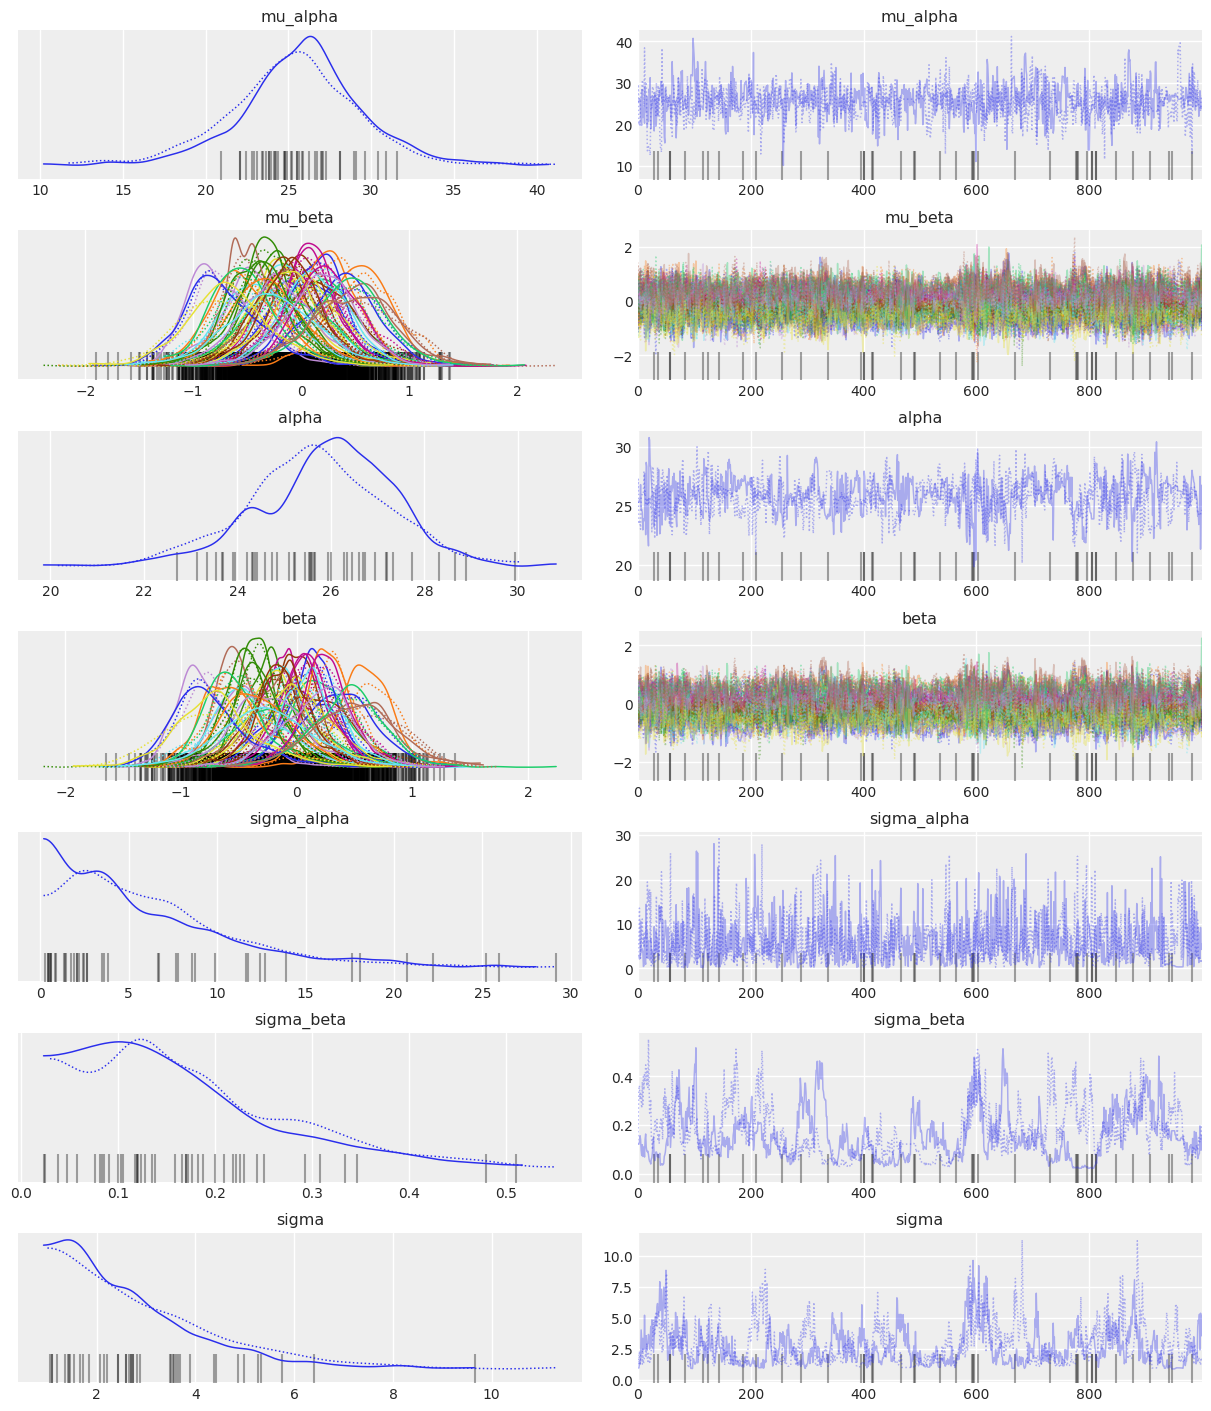

In [32]:
az.plot_trace(hier_traces[0]);

### Prior sensitivty for the hierarchical model

In [50]:
hier_models_sens = []
hier_traces_sens = []
for i in range(5):
    with pm.Model() as hierarchical_model:
        # hyper-priors
        mu_alpha = pm.Uniform('mu_alpha', 0, 10)
        sigma_alpha = pm.HalfCauchy('sigma_alpha', beta=10)
        mu_beta = pm.Uniform('mu_beta', 0, 10, shape=40)
        sigma_beta = pm.HalfCauchy('sigma_beta', beta=10, shape=40)
        sigma = pm.HalfCauchy('sigma', beta=10)

        # priors
        alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha)
        beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=40)

        # likelihood
        mu = alpha + pm.math.dot(x_train[i], beta)
        y_pred = pm.StudentT('y_pred', nu=4, mu=mu, sd=sigma, observed=y_train[i])

        trace = pm.sample(1000, tune=1000, cores=2, chains=2, return_inferencedata=True)
        hier_models_sens.append(hierarchical_model_mlr)
        hier_traces_sens.append(trace)

ERROR:pymc3:There were 198 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 243 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 159 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 129 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 125 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 149 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


ERROR:pymc3:There were 98 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 161 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


In [47]:
trace_lb_hier = hier_traces_sens[0]
post_hier = az.convert_to_dataset(trace_lb_hier)
mu_lb_hier = post_hier.alpha[0]
sigma_hier = post_hier.sigma.values[0]

y_lb_hier = np.zeros(len(mu_lb_hier))

for i, current_mu in enumerate(mu_lb_hier):
    y_lb_hier[i] = np.random.normal(loc = mu_lb_hier[i], scale = sigma_hier[i])

#the predictions of the hierarchical model are slightly lower and pulled towards the mean of the pooled model.
#yet the difference is small since there are many songs from Beyonce. 
df = pd.DataFrame(y_lb_hier)
df.describe(percentiles=[0.025, 0.975])

,0
count,1000.000000
mean,32.557021
std,39.388972
min,-222.886633
2.5%,-51.484404
50%,36.767689
97.5%,97.747541
max,338.684160


/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


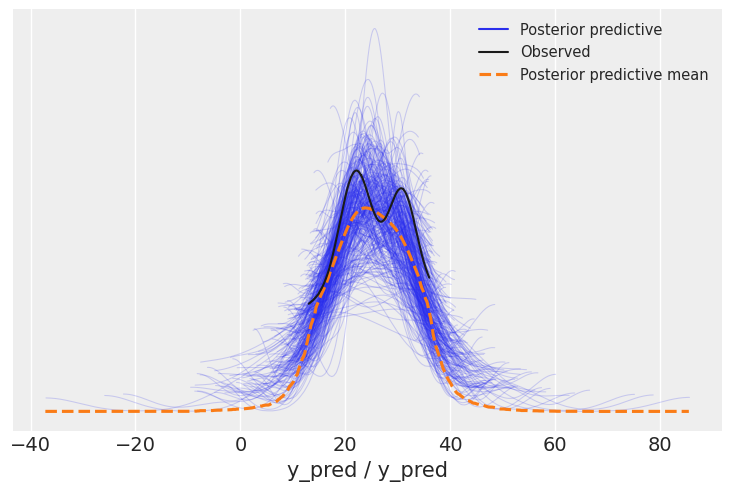

In [48]:
ppc = pm.sample_posterior_predictive(hier_traces[0], samples=300, model=hier_models[0])
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=hier_models[0]));

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


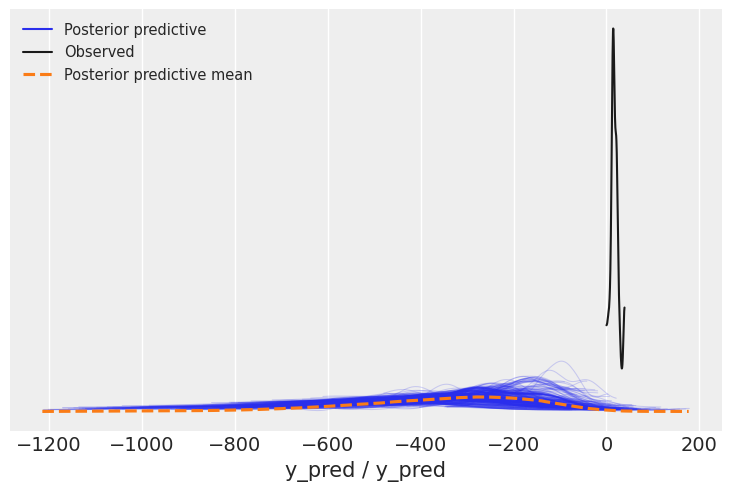

In [51]:
ppc = pm.sample_posterior_predictive(hier_traces_sens[0], samples=300, model=hier_models_sens[0])
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=hier_models_sens[0]));

### WAIC comparisons

In [52]:
for i in range(5):
  print(az.waic(hier_traces[i]))

Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -131.08     0.97
p_waic       44.38        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -177.05     1.69
p_waic       36.51        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -144.28     1.05
p_waic       41.64        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -145.66     1.71
p_waic       42.82        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples

/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log

In [57]:
for i in range(5):
  print(az.waic(unpooled_traces[i]))

Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -161.50     1.40
p_waic       46.77        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -192.19     1.49
p_waic       45.25        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -169.08     1.01
p_waic       44.63        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 40 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -178.19     0.61
p_waic       46.58        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples

/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log

Summing the values, the hierarchical model is superior.

## HM vs PM on novelty

In [70]:
print(az.waic(trace_novel))
print(az.waic(trace_h_novel))

Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -746.71    10.77
p_waic       48.46        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -745.01    10.75
p_waic       44.50        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


## Pooled model

### Preprocessing

In [46]:
# Data
training = pd.read_pickle('train.pkl')
testing = pd.read_pickle('test.pkl')

# Save the player for novel predictions
novel_player_features_p = training.tail(1).x_train_1.values[0]

# remove the last row with the problematic player
training = training.drop(training.index[[-1]])
testing = testing.drop(testing.index[[-1]])

# Features and labels:
# Note: the data has already been centered during preprocessing.
x_train_p = np.concatenate(np.concatenate(training.iloc[:, 2:42].values)).reshape(200, 40)
y_train_p = np.concatenate(training.iloc[:, 42:82].values).astype(np.float64)

x_test_p = np.concatenate(testing.x_test_1.values).reshape(200, 1)
y_test_p = testing.y_test_1.values.astype(np.float64)

### Modelling

In [52]:
# model
with pm.Model() as pooled_model:
    # priors:
    alpha = pm.Normal('alpha', mu=mu_y, sigma=s_y)
    beta = pm.Normal('beta', mu=0, sigma=s_x, shape=40)
    sigma = pm.HalfNormal('sigma', sigma=s_y)

    # likelihood:
    mu = alpha + pm.math.dot(x_train, beta)

    # observed data, since we were missing some density in the predictive checks, we used a more robust
    # distribution with the student t.
    y_pred = pm.StudentT ('y_pred', nu=4, mu=mu, sd=sigma, observed= y_train)

    # inference:
    trace_pooled = pm.sample(1000, tune=1000, cores=2, chains=2, return_inferencedata=True)

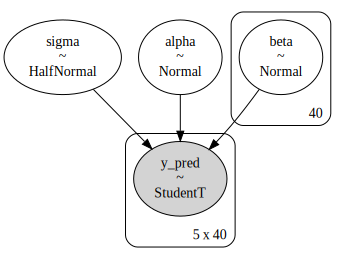

In [54]:
pm.model_to_graphviz(pooled_model)

### Convergence

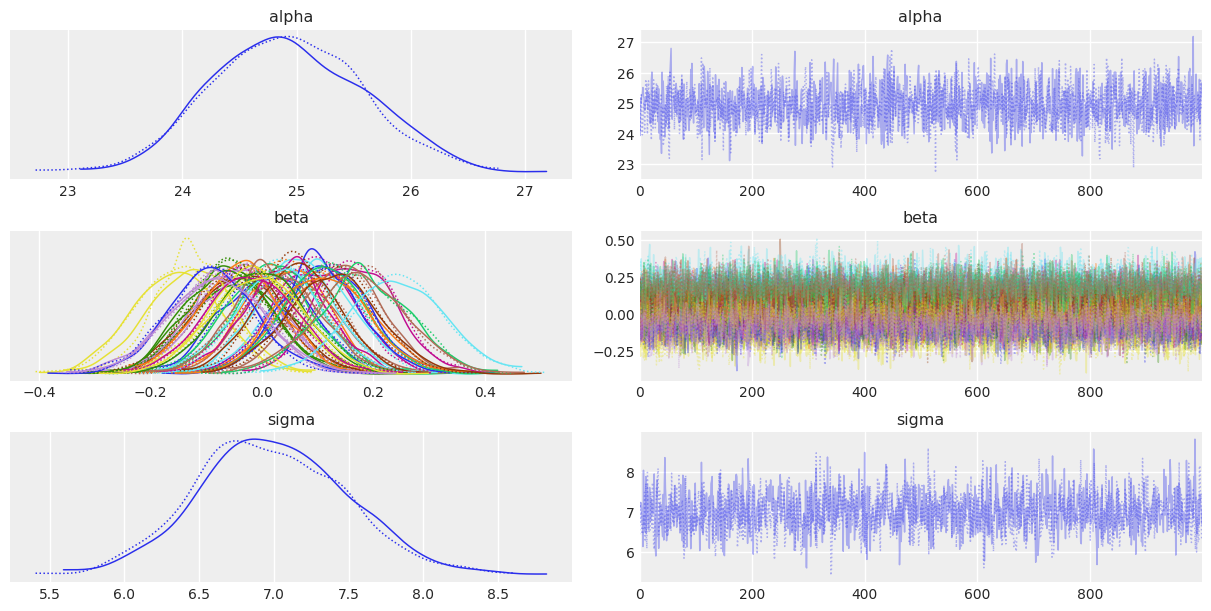

In [53]:
with pooled_model:
    az.plot_trace(trace);

In [55]:
az.summary(trace_pooled)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,24.901,0.641,23.678,26.093,0.013,0.009,2324.0,1688.0,1.0
beta[0],0.007,0.083,-0.137,0.176,0.002,0.002,1913.0,1130.0,1.0
beta[1],0.109,0.080,-0.044,0.253,0.002,0.001,2245.0,1585.0,1.0
beta[2],-0.036,0.079,-0.190,0.107,0.002,0.001,2213.0,1391.0,1.0
beta[3],0.099,0.077,-0.048,0.238,0.002,0.001,1957.0,1554.0,1.0
beta[4],-0.052,0.083,-0.207,0.101,0.002,0.001,2174.0,1514.0,1.0
beta[5],0.092,0.078,-0.043,0.248,0.002,0.001,1981.0,1549.0,1.0
beta[6],-0.150,0.078,-0.298,-0.013,0.002,0.001,2031.0,1445.0,1.0
beta[7],0.008,0.077,-0.136,0.153,0.002,0.002,1698.0,1260.0,1.0
beta[8],-0.044,0.080,-0.191,0.101,0.002,0.002,1780.0,1540.0,1.0


## Predictive cheks

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


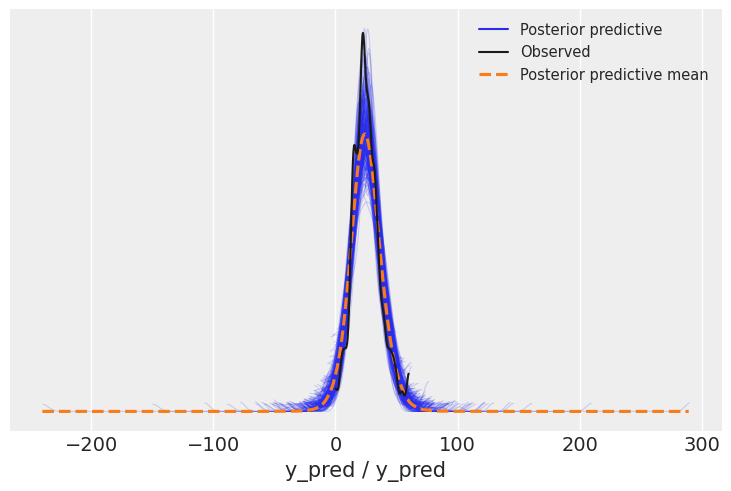

In [62]:
with pooled_model:
     ppc = pm.sample_posterior_predictive(trace, samples=300)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=pooled_model));

### Mean LeBron

In [63]:
x_lebron = np.array(x_train)[0, :, :]

In [74]:
alpha_samples = trace_pooled.posterior.alpha.values.reshape(2000)
beta_samples = trace_pooled.posterior.beta.values.reshape(2000, 40)
mu_player = alpha_samples + np.dot(x_lebron, beta_samples.T)

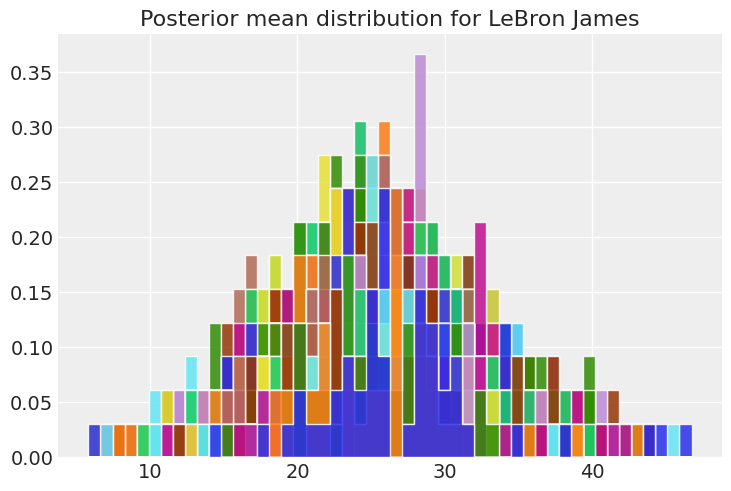

LeBron James predicted mean: 25.244
LeBron James predicted mean standard deviation: 5.021


In [76]:
# plot the posterior predictive distribution
plt.hist(mu_player, bins=50, density=True,histtype='stepfilled', alpha=0.85)
plt.title('Posterior mean distribution for LeBron James')
plt.show()

# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted mean: {mu_player.mean():.3f}')
print(f'LeBron James predicted mean standard deviation: {mu_player.std():.3f}')

### Prediction for LeBron's next game

In [94]:
x_lebron_test = x_test[0].ravel()
alpha_samples = trace_pooled.posterior.alpha.values.reshape(2000)
beta_samples = trace_pooled.posterior.beta.values.reshape(2000, 40)
sigma_samples = trace_pooled.posterior.sigma.values.reshape(2000)

In [95]:
predictive_distribution = []

for i in range(len(alpha_samples)):
    mu_player = alpha_samples[i] + np.dot(x_lebron_test, beta_samples[i])
    y_pred = np.random.normal(mu_player, sigma_samples[i])

    y_pred = np.random.normal(loc=mu_player, scale=sigma_samples[i])
    predictive_distribution.append(y_pred)

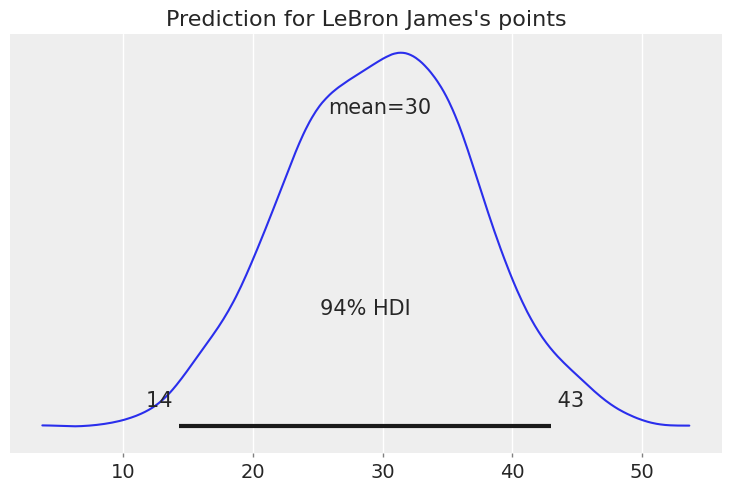

In [96]:
az.plot_posterior(np.array(predictive_distribution))
plt.title("Prediction for LeBron James's points");

In [97]:
# print the mean and standard deviation of the posterior predictive distribution
print(f'LeBron James predicted mean: {np.array(predictive_distribution).mean():.3f}')
print(f'LeBron James predicted mean standard deviation: {np.array(predictive_distribution).std():.3f}')

LeBron James predicted mean: 29.790
LeBron James predicted mean standard deviation: 7.625


### Posterior prediction of a novel player

In [99]:
x_new = novel_player_features_p

In [61]:
with pm.Model() as model_pooled_with_prediction:

    alpha = pm.Normal('alpha', mu=mu_y, sigma=s_y)
    beta = pm.Normal('beta', mu=0, sigma=s_x, shape=40)
    sigma = pm.HalfNormal('sigma', sigma=s_y)

    # likelihood:
    mu = alpha + pm.math.dot(x_train, beta)

    # observed data:
    y_pred = pm.StudentT ('y_pred', nu=4, mu=mu, sd=sigma, observed= y_train)

    # Novel player
    x_novel = pm.Data("x_novel", x_new)
    mu_novel = alpha + pm.math.dot(x_novel, beta)
    y_novel = pm.Normal("y_novel", mu=mu_novel, sigma=sigma)

In [65]:
with model_pooled_with_prediction:
    # inference:
    trace_novel = pm.sample(1000, tune=1000, cores=2, chains=2, return_inferencedata=True)

In [107]:
with model_pooled_with_prediction:
    display(az.summary(trace_novel, var_names=['y_novel']))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_novel,6.069,8.469,-9.703,21.657,0.168,0.16,2547.0,1536.0,1.0
